<a href="https://colab.research.google.com/github/huytuan3108/bai_tap_fuzzy/blob/main/2_2_2_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.4 MB/s eta 0:00:00


Bệnh án: 6.89393939393939


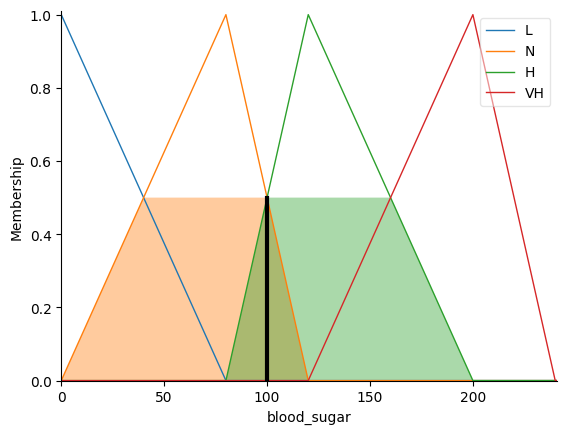

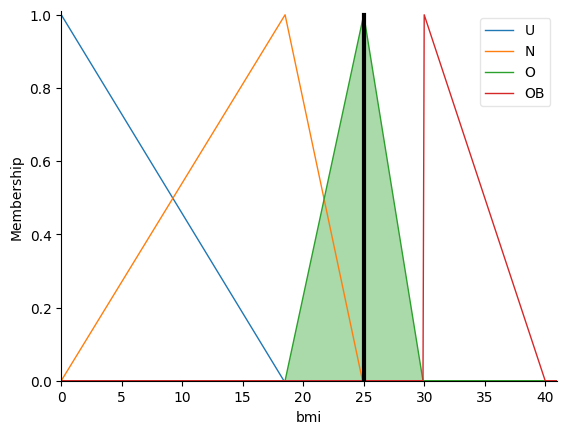

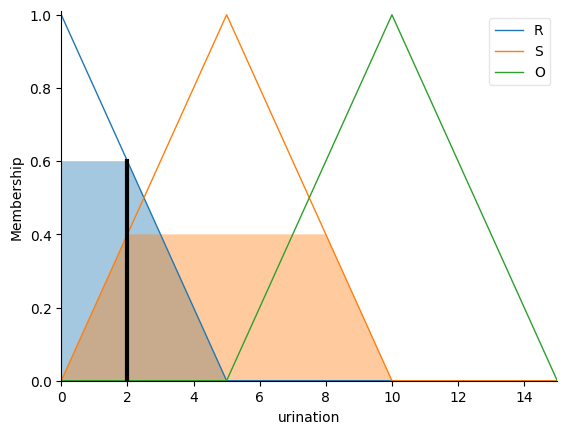

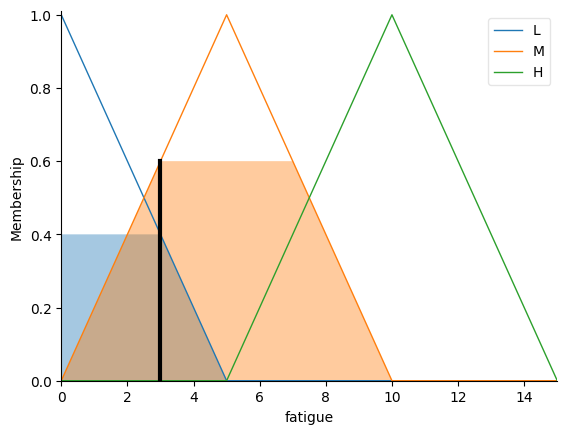

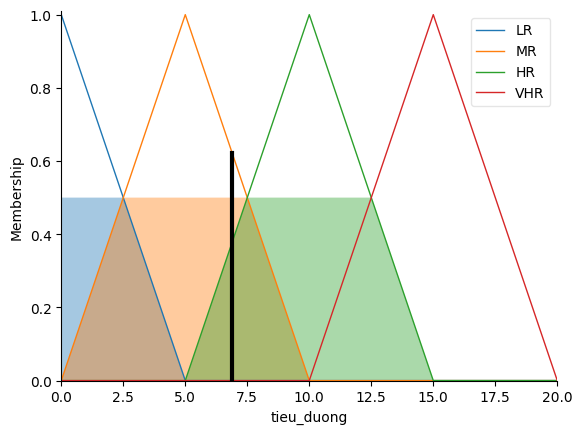

In [2]:
#2.2
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
blood_sugar=ctrl.Antecedent(np.arange(0,241.1,0.1),'blood_sugar')
bmi=ctrl.Antecedent(np.arange(0,41.1,0.1),'bmi')
urination=ctrl.Antecedent(np.arange(0,15.1,0.1),'urination')
fatigue=ctrl.Antecedent(np.arange(0,15.1,0.1),'fatigue')
tieu_duong=ctrl.Consequent(np.arange(0,20.1,0.1),'tieu_duong')

blood_sugar['L']=fuzz.trimf(blood_sugar.universe,[0,0,80])
blood_sugar['N']=fuzz.trimf(blood_sugar.universe,[0,80,120])
blood_sugar['H']=fuzz.trimf(blood_sugar.universe,[80,120,200])
blood_sugar['VH']=fuzz.trimf(blood_sugar.universe,[120,200,240])

bmi['U']=fuzz.trimf(bmi.universe,[0,0,18.4])
bmi['N']=fuzz.trimf(bmi.universe,[0,18.5,24.9])
bmi['O']=fuzz.trimf(bmi.universe,[18.5,25,29.9])
bmi['OB']=fuzz.trimf(bmi.universe,[29.9,30,40])

urination['R']=fuzz.trimf(urination.universe,[0,0,5])
urination['S']=fuzz.trimf(urination.universe,[0,5,10])
urination['O']=fuzz.trimf(urination.universe,[5,10,15])

fatigue['L']=fuzz.trimf(fatigue.universe,[0,0,5])
fatigue['M']=fuzz.trimf(fatigue.universe,[0,5,10])
fatigue['H']=fuzz.trimf(fatigue.universe,[5,10,15])

tieu_duong['LR']=fuzz.trimf(tieu_duong.universe,[0,0,5])
tieu_duong['MR']=fuzz.trimf(tieu_duong.universe,[0,5,10])
tieu_duong['HR']=fuzz.trimf(tieu_duong.universe,[5,10,15])
tieu_duong['VHR']=fuzz.trimf(tieu_duong.universe,[10,15,20])

rule1 = ctrl.Rule(blood_sugar['VH'] & urination['O'], tieu_duong['VHR'])
rule2 = ctrl.Rule(blood_sugar['VH'] & urination['S'], tieu_duong['HR'])
rule3 = ctrl.Rule(blood_sugar['H'] & urination['O'], tieu_duong['HR'])
rule4 = ctrl.Rule(blood_sugar['N'] & urination['R'], tieu_duong['LR'])

rule5 = ctrl.Rule(blood_sugar['VH'] & bmi['OB'], tieu_duong['VHR'])
rule6 = ctrl.Rule(blood_sugar['VH'] & bmi['O'], tieu_duong['HR'])
rule7 = ctrl.Rule(blood_sugar['H'] & bmi['O'], tieu_duong['HR'])
rule8 = ctrl.Rule(blood_sugar['H'] & bmi['O'], tieu_duong['MR'])
rule9 = ctrl.Rule(blood_sugar['N'] & bmi['N'], tieu_duong['LR'])

rule10 = ctrl.Rule(blood_sugar['VH'] & fatigue['H'], tieu_duong['VHR'])
rule11 = ctrl.Rule(blood_sugar['H'] & fatigue['H'], tieu_duong['HR'])
rule12 = ctrl.Rule(blood_sugar['H'] & fatigue['M'], tieu_duong['MR'])
rule13 = ctrl.Rule(blood_sugar['N'] & fatigue['L'], tieu_duong['LR'])
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['blood_sugar'] = 100
fuzzy_system.input['urination'] = 2
fuzzy_system.input['fatigue'] = 3
fuzzy_system.input['bmi'] = 25
fuzzy_system.compute()
print("Bệnh án:",fuzzy_system.output['tieu_duong'])
blood_sugar.view(sim=fuzzy_system)
bmi.view(sim=fuzzy_system)
urination.view(sim=fuzzy_system)
fatigue.view(sim=fuzzy_system)
tieu_duong.view(sim=fuzzy_system)

giá cuối cùng: 11.206896551724137


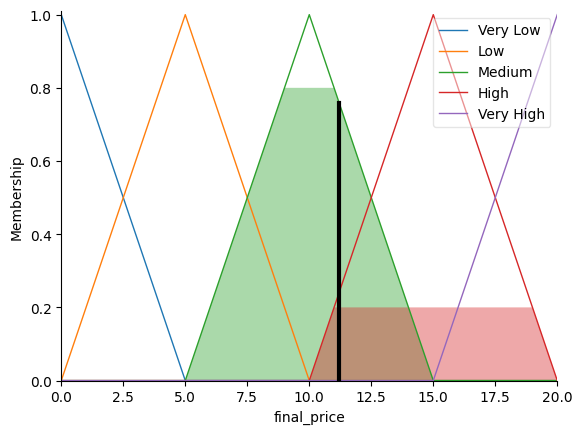

In [3]:
#2.3
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
demand = ctrl.Antecedent(np.arange(0, 11, 1), 'demand')
competitor_price = ctrl.Antecedent(np.arange(0, 11, 1), 'competitor_price')
production_cost = ctrl.Antecedent(np.arange(0, 11, 1), 'production_cost')
seasonality = ctrl.Antecedent(np.arange(0, 11, 1), 'seasonality')
stock_level = ctrl.Antecedent(np.arange(0, 11, 1), 'stock_level')
final_price = ctrl.Consequent(np.arange(0, 21, 1), 'final_price')
demand['Low'] = fuzz.trimf(demand.universe, [0, 0, 5])
demand['Medium'] = fuzz.trimf(demand.universe, [0, 5, 10])
demand['High'] = fuzz.trimf(demand.universe, [5, 10, 10])
competitor_price['Low'] = fuzz.trimf(competitor_price.universe, [0, 0, 5])
competitor_price['Medium'] = fuzz.trimf(competitor_price.universe, [0, 5, 10])
competitor_price['High'] = fuzz.trimf(competitor_price.universe, [5, 10, 10])
production_cost['Low'] = fuzz.trimf(production_cost.universe, [0, 0, 5])
production_cost['Medium'] = fuzz.trimf(production_cost.universe, [0, 5, 10])
production_cost['High'] = fuzz.trimf(production_cost.universe, [5, 10, 10])
seasonality['Off-Peak'] = fuzz.trimf(seasonality.universe, [0, 0, 5])
seasonality['Normal'] = fuzz.trimf(seasonality.universe, [0, 5, 10])
seasonality['Peak'] = fuzz.trimf(seasonality.universe, [5, 10, 10])
stock_level['Low'] = fuzz.trimf(stock_level.universe, [0, 0, 5])
stock_level['Medium'] = fuzz.trimf(stock_level.universe, [0, 5, 10])
stock_level['High'] = fuzz.trimf(stock_level.universe, [5, 10, 10])
final_price['Very Low'] = fuzz.trimf(final_price.universe, [0, 0, 5])
final_price['Low'] = fuzz.trimf(final_price.universe, [0,5,10])
final_price['Medium'] = fuzz.trimf(final_price.universe, [5,10,15])
final_price['High'] = fuzz.trimf(final_price.universe, [10,15,20])
final_price['Very High'] = fuzz.trimf(final_price.universe, [15,20,20])
rule1 = ctrl.Rule(demand['High'] & competitor_price['High'] & stock_level['Low'], final_price['Very High'])
rule2 = ctrl.Rule(demand['High'] & seasonality['Peak'] & stock_level['Low'], final_price['Very High'])
rule3 = ctrl.Rule(demand['Medium'] & production_cost['High'] & stock_level['Low'], final_price['Very High'])
rule4 = ctrl.Rule(demand['High'] & competitor_price['Medium'] & stock_level['Medium'], final_price['High'])
rule5 = ctrl.Rule(demand['Medium'] & competitor_price['High'] & stock_level['Low'], final_price['High'])
rule6 = ctrl.Rule(demand['High'] & seasonality['Peak'] & stock_level['Medium'], final_price['High'])
rule7 = ctrl.Rule(demand['Medium'] & competitor_price['Medium'] & stock_level['Medium'], final_price['Medium'])
rule8 = ctrl.Rule(demand['Low'] & competitor_price['High'] & stock_level['Medium'], final_price['Medium'])
rule9 = ctrl.Rule(demand['Medium'] & production_cost['Medium'] & stock_level['Medium'], final_price['Medium'])
rule10 = ctrl.Rule(demand['Low'] & competitor_price['Low'] & stock_level['High'], final_price['Low'])
rule11 = ctrl.Rule(demand['Medium'] & production_cost['Low'] & stock_level['High'], final_price['Low'])
rule12 = ctrl.Rule(demand['Low'] & seasonality['Off-Peak'] & stock_level['High'], final_price['Low'])

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11])
fuzzy_system= ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['demand'] =5
fuzzy_system.input['competitor_price'] =6
fuzzy_system.input['production_cost'] =1
fuzzy_system.input['seasonality'] =1
fuzzy_system.input['stock_level'] =4
fuzzy_system.compute()
print("giá cuối cùng:", fuzzy_system.output['final_price'])
final_price.view(sim=fuzzy_system)



Thời gian: 7.248427672955979
Nước: 7.248427672955979


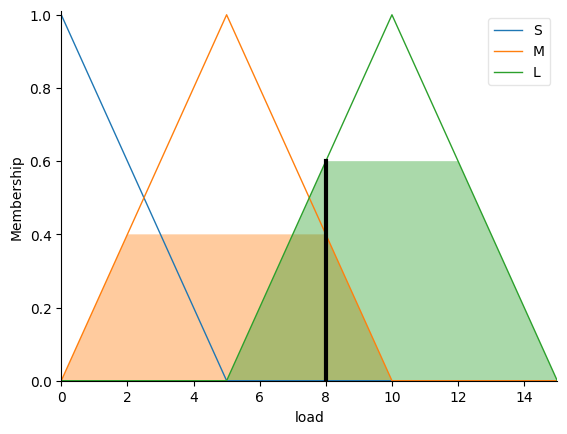

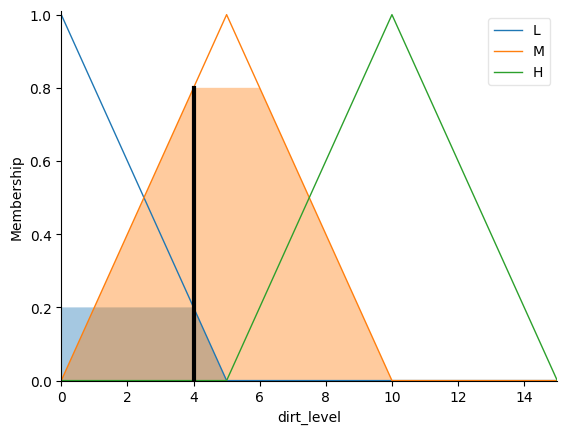

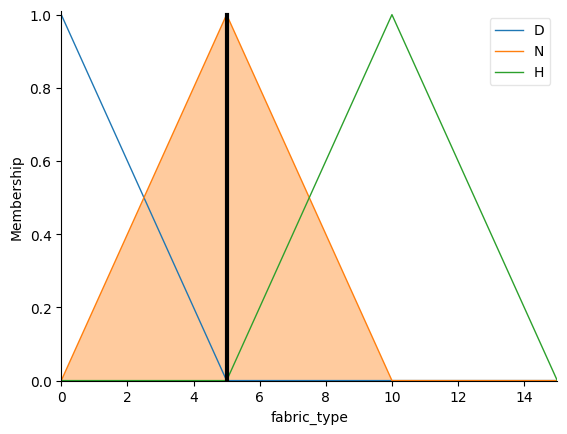

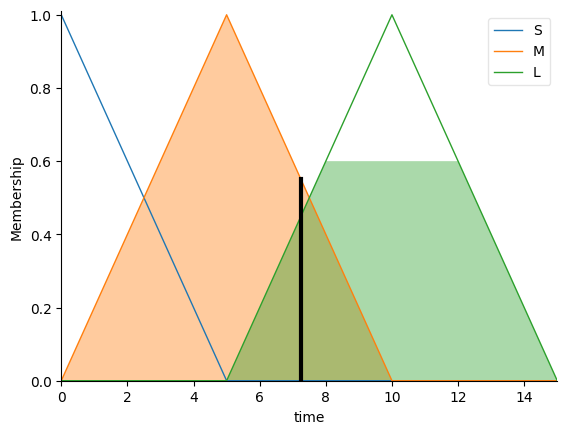

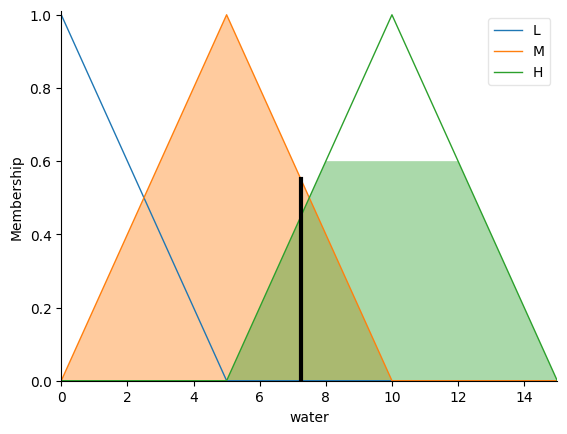

In [4]:
#2.4
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
load=ctrl.Antecedent(np.arange(0,15.1,0.1),'load')
dirt_level=ctrl.Antecedent(np.arange(0,15.1,0.1),'dirt_level')
fabric_type=ctrl.Antecedent(np.arange(0,15.1,0.1),'fabric_type')
time=ctrl.Consequent(np.arange(0,15.1,0.1),'time')
water=ctrl.Consequent(np.arange(0,15.1,0.1),'water')
load['S']=fuzz.trimf(load.universe,[0,0,5])
load['M']=fuzz.trimf(load.universe,[0,5,10])
load['L']=fuzz.trimf(load.universe,[5,10,15])

dirt_level['L']=fuzz.trimf(dirt_level.universe,[0,0,5])
dirt_level['M']=fuzz.trimf(dirt_level.universe,[0,5,10])
dirt_level['H']=fuzz.trimf(dirt_level.universe,[5,10,15])

fabric_type['D']=fuzz.trimf(fabric_type.universe,[0,0,5])
fabric_type['N']=fuzz.trimf(fabric_type.universe,[0,5,10])
fabric_type['H']=fuzz.trimf(fabric_type.universe,[5,10,15])

time['S']=fuzz.trimf(time.universe,[0,0,5])
time['M']=fuzz.trimf(time.universe,[0,5,10])
time['L']=fuzz.trimf(time.universe,[5,10,15])

water['L']=fuzz.trimf(water.universe,[0,0,5])
water['M']=fuzz.trimf(water.universe,[0,5,10])
water['H']=fuzz.trimf(water.universe,[5,10,15])

rule1 = ctrl.Rule(load['S'] & dirt_level['L'], (time['S'], water['L']))
rule2 = ctrl.Rule(load['S'] & dirt_level['M'], (time['M'], water['M']))
rule3 = ctrl.Rule(load['S'] & dirt_level['H'], (time['L'], water['M']))
rule4 = ctrl.Rule(load['M'] & dirt_level['L'], (time['M'], water['M']))
rule5 = ctrl.Rule(load['M'] & dirt_level['M'], (time['L'], water['M']))
rule6 = ctrl.Rule(load['M'] & dirt_level['H'], (time['L'], water['H']))
rule7 = ctrl.Rule(load['L'] & dirt_level['L'], (time['M'], water['H']))
rule8 = ctrl.Rule(load['L'] & dirt_level['L'], (time['L'], water['H']))
rule9 = ctrl.Rule(load['L'] & dirt_level['M'], (time['L'], water['H']))
rule10 = ctrl.Rule(load['L'] & dirt_level['M'], (time['L'], water['H']))
rule11 = ctrl.Rule(load['L'] & dirt_level['H'], (time['L'], water['H']))
rule12 = ctrl.Rule(fabric_type['D'], (time['S'], water['L']))
rule13 = ctrl.Rule(fabric_type['N'], (time['M'], water['M']))
rule14 = ctrl.Rule(fabric_type['H'], (time['L'], water['H']))
rule15 = ctrl.Rule(load['L'] & dirt_level['H'] & fabric_type['H'], (time['L'], water['H']))
rule16 = ctrl.Rule(load['S'] & dirt_level['L'] & fabric_type['D'], (time['S'], water['L']))
rule17 = ctrl.Rule(load['M'] & dirt_level['M'] & fabric_type['N'], (time['M'], water['M']))
control_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['load'] =8
fuzzy_system.input['dirt_level'] =4
fuzzy_system.input['fabric_type']=5
fuzzy_system.compute()
print("Thời gian:",fuzzy_system.output['time'])
print("Nước:",fuzzy_system.output['water'])
load.view(sim=fuzzy_system)
dirt_level.view(sim=fuzzy_system)
fabric_type.view(sim=fuzzy_system)
time.view(sim=fuzzy_system)
water.view(sim=fuzzy_system)

Tốc độ gió: 6.725490196078434
Cấp nhiệt: 6.725490196078434


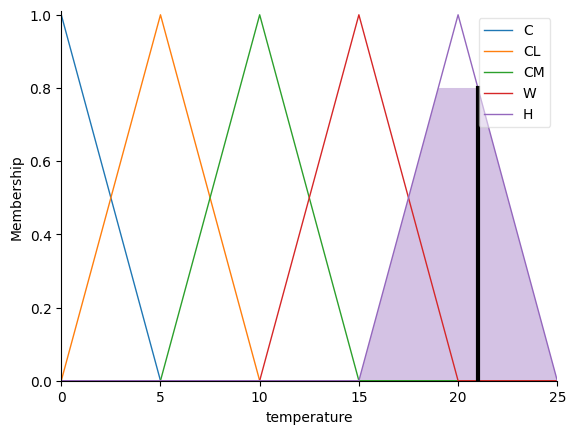

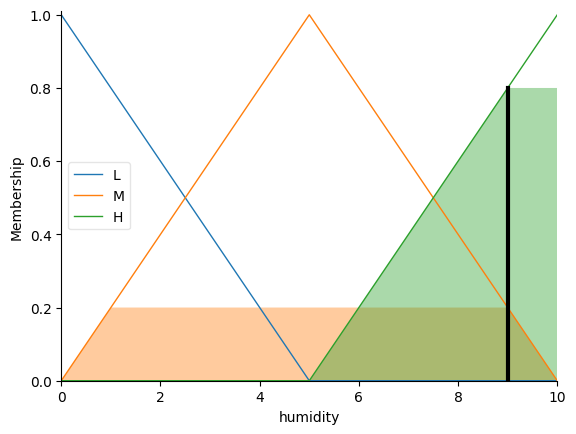

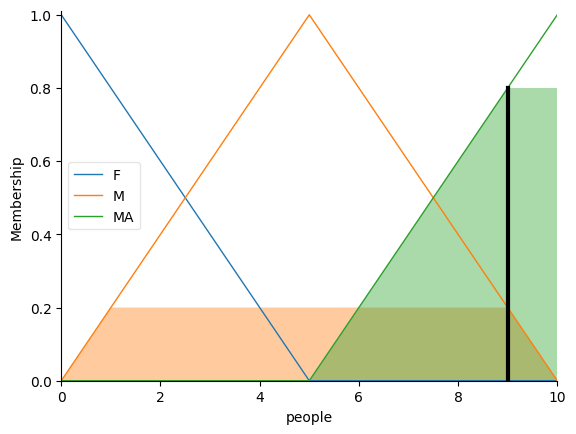

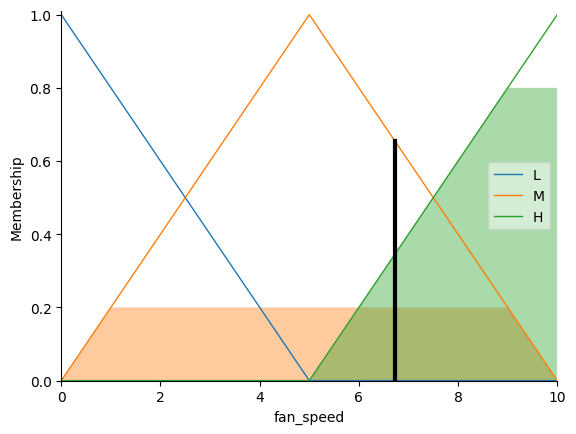

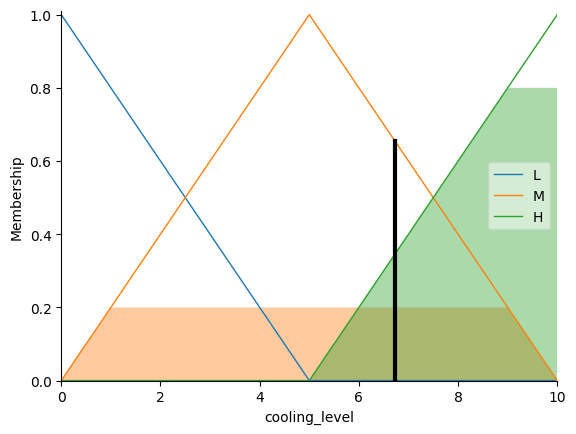

In [5]:
#2.5
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
temperature=ctrl.Antecedent(np.arange(0,25.1,0.1),'temperature')
humidity=ctrl.Antecedent(np.arange(0,10.1,0.1),'humidity')
people=ctrl.Antecedent(np.arange(0,10.1,0.1),'people')
fan_speed=ctrl.Consequent(np.arange(0,10.1,0.1),'fan_speed')
cooling_level=ctrl.Consequent(np.arange(0,10.1,0.1),'cooling_level')

temperature['C']=fuzz.trimf(temperature.universe,[0,0,5])
temperature['CL']=fuzz.trimf(temperature.universe,[0,5,10])
temperature['CM']=fuzz.trimf(temperature.universe,[5,10,15])
temperature['W']=fuzz.trimf(temperature.universe,[10,15,20])
temperature['H']=fuzz.trimf(temperature.universe,[15,20,25])

humidity['L']=fuzz.trimf(humidity.universe,[0,0,5])
humidity['M']=fuzz.trimf(humidity.universe,[0,5,10])
humidity['H']=fuzz.trimf(humidity.universe,[5,10,10])

people['F']=fuzz.trimf(people.universe,[0,0,5])
people['M']=fuzz.trimf(people.universe,[0,5,10])
people['MA']=fuzz.trimf(people.universe,[5,10,10])

fan_speed['L']=fuzz.trimf(fan_speed.universe,[0,0,5])
fan_speed['M']=fuzz.trimf(fan_speed.universe,[0,5,10])
fan_speed['H']=fuzz.trimf(fan_speed.universe,[5,10,10])

cooling_level['L']=fuzz.trimf(cooling_level.universe,[0,0,5])
cooling_level['M']=fuzz.trimf(cooling_level.universe,[0,5,10])
cooling_level['H']=fuzz.trimf(cooling_level.universe,[5,10,10])

rule1 = ctrl.Rule(temperature['C'], fan_speed['L'])
rule2 = ctrl.Rule(temperature['CL'], fan_speed['L'])
rule3 = ctrl.Rule(temperature['CM'], fan_speed['M'])
rule4 = ctrl.Rule(temperature['W'], fan_speed['H'])
rule5 = ctrl.Rule(temperature['H'], fan_speed['H'])
rule6 = ctrl.Rule(temperature['C'], cooling_level['L'])
rule7 = ctrl.Rule(temperature['CL'], cooling_level['L'])
rule8 = ctrl.Rule(temperature['CM'], cooling_level['M'])
rule9 = ctrl.Rule(temperature['W'], cooling_level['H'])
rule10 = ctrl.Rule(temperature['H'], cooling_level['H'])
rule11 = ctrl.Rule(humidity['M'], cooling_level['M'])
rule12 = ctrl.Rule(humidity['H'], cooling_level['H'])
rule13 = ctrl.Rule(people['F'], fan_speed['L'])
rule14 = ctrl.Rule(people['M'], fan_speed['M'])
rule15 = ctrl.Rule(people['MA'], fan_speed['H'])
rule16 = ctrl.Rule(temperature['H'] & humidity['H'] & people['MA'], (cooling_level['H'], fan_speed['H']))
rule17 = ctrl.Rule(temperature['CM'] & humidity['M'] & people['M'], (cooling_level['M'], fan_speed['M']))
rule18 = ctrl.Rule(temperature['CL'] & humidity['L'] & people['F'], (cooling_level['L'], fan_speed['L']))
control_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['temperature'] = 21
fuzzy_system.input['humidity'] = 9
fuzzy_system.input['people'] = 9
fuzzy_system.compute()
print("Tốc độ gió:",fuzzy_system.output['fan_speed'])
print("Cấp nhiệt:",fuzzy_system.output['cooling_level'])
temperature.view(sim=fuzzy_system)
humidity.view(sim=fuzzy_system)
people.view(sim=fuzzy_system)
fan_speed.view(sim=fuzzy_system)
cooling_level.view(sim=fuzzy_system)

Thời gian chế biến: 5.8780487804878065
Công suất: 56.55892255892249


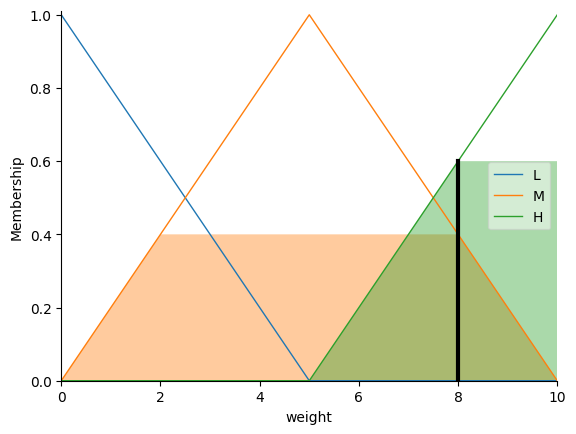

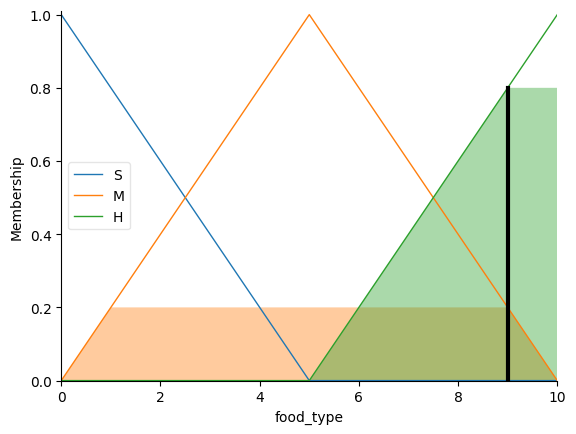

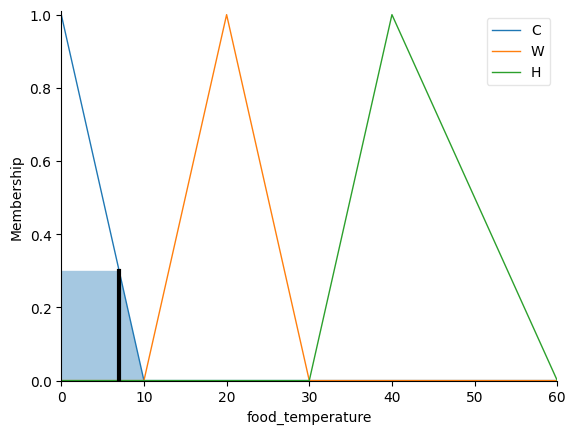

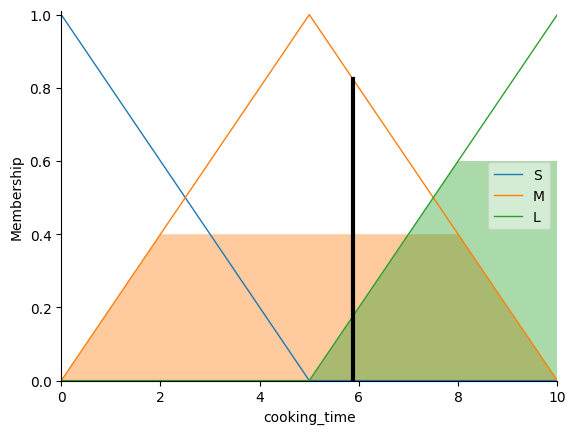

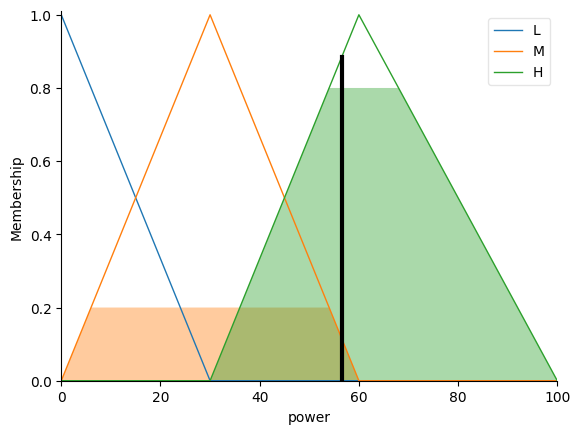

In [6]:
#2.6
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
weight=ctrl.Antecedent(np.arange(0,10.1,0.1),'weight')
food_type=ctrl.Antecedent(np.arange(0,10.1,0.1),'food_type')
food_temperature=ctrl.Antecedent(np.arange(0,60.1,0.1),'food_temperature')
cooking_time=ctrl.Consequent(np.arange(0,10.1,0.1),'cooking_time')
power=ctrl.Consequent(np.arange(0,100.1,0.1),'power')

weight['L']=fuzz.trimf(weight.universe,[0,0,5])
weight['M']=fuzz.trimf(weight.universe,[0,5,10])
weight['H']=fuzz.trimf(weight.universe,[5,10,10])

food_type['S']=fuzz.trimf(food_type.universe,[0,0,5])
food_type['M']=fuzz.trimf(food_type.universe,[0,5,10])
food_type['H']=fuzz.trimf(food_type.universe,[5,10,10])

food_temperature['C']=fuzz.trimf(food_temperature.universe,[0,0,10])
food_temperature['W']=fuzz.trimf(food_temperature.universe,[10,20,30])
food_temperature['H']=fuzz.trimf(food_temperature.universe,[30,40,60])

cooking_time['S']=fuzz.trimf(cooking_time.universe,[0,0,5])
cooking_time['M']=fuzz.trimf(cooking_time.universe,[0,5,10])
cooking_time['L']=fuzz.trimf(cooking_time.universe,[5,10,10])

power['L']=fuzz.trimf(power.universe,[0,0,30])
power['M']=fuzz.trimf(power.universe,[0,30,60])
power['H']=fuzz.trimf(power.universe,[30,60,100])

rule1 = ctrl.Rule(weight['L'], cooking_time['S'])
rule2 = ctrl.Rule(weight['M'], cooking_time['M'])
rule3 = ctrl.Rule(weight['H'], cooking_time['L'])
rule4 = ctrl.Rule(food_type['S'], power['L'])
rule5 = ctrl.Rule(food_type['M'], power['M'])
rule6 = ctrl.Rule(food_type['H'], power['H'])
rule7 = ctrl.Rule(food_temperature['C'], cooking_time['L'])
rule8 = ctrl.Rule(food_temperature['W'], cooking_time['M'])
rule9 = ctrl.Rule(food_temperature['H'], cooking_time['S'])
rule10 = ctrl.Rule(weight['H'] & food_type['H'] & food_temperature['C'], (cooking_time['L'], power['H']))
rule11 = ctrl.Rule(weight['M'] & food_type['S'] & food_temperature['W'], (cooking_time['M'], power['L']))
rule12 = ctrl.Rule(weight['L'] & food_type['M'] & food_temperature['H'], (cooking_time['S'], power['M']))
control_system = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['weight'] = 8
fuzzy_system.input['food_type'] = 9
fuzzy_system.input['food_temperature'] = 7
fuzzy_system.compute()
print("Thời gian chế biến:",fuzzy_system.output['cooking_time'])
print("Công suất:",fuzzy_system.output['power'])
weight.view(sim=fuzzy_system)
food_type.view(sim=fuzzy_system)
food_temperature.view(sim=fuzzy_system)
cooking_time.view(sim=fuzzy_system)
power.view(sim=fuzzy_system)

thời gian nấu: 6.787769784172662
mức nhiệt: 72.02446384308655


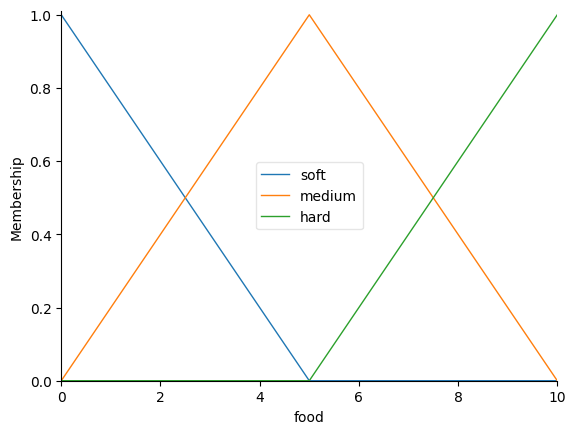

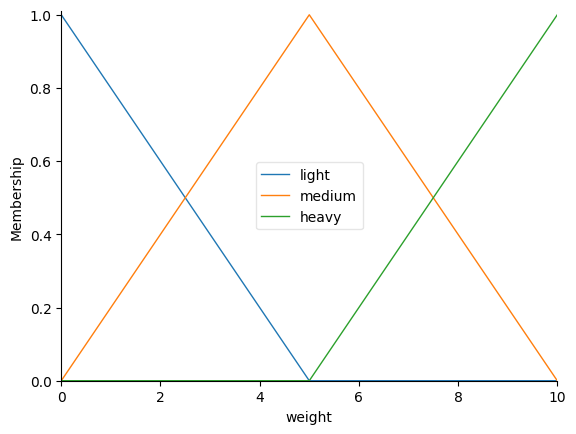

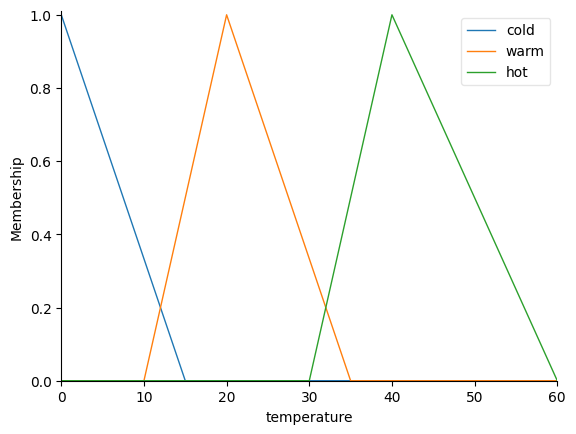

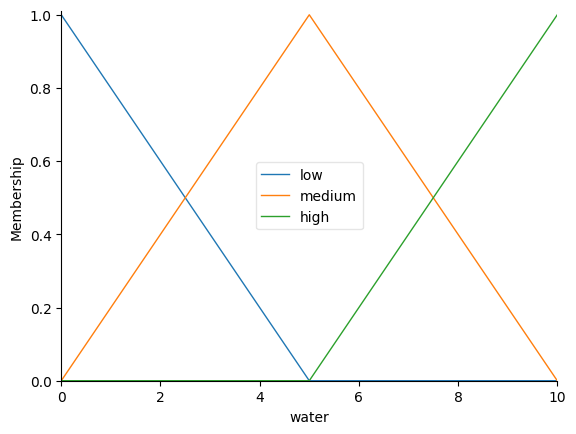

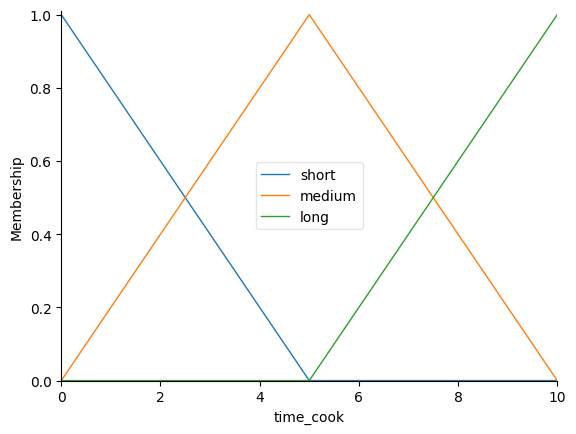

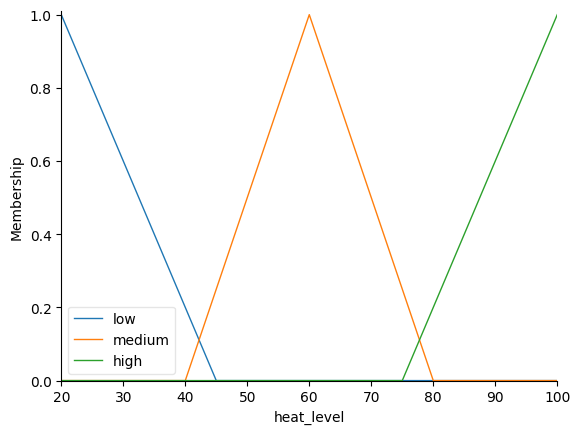

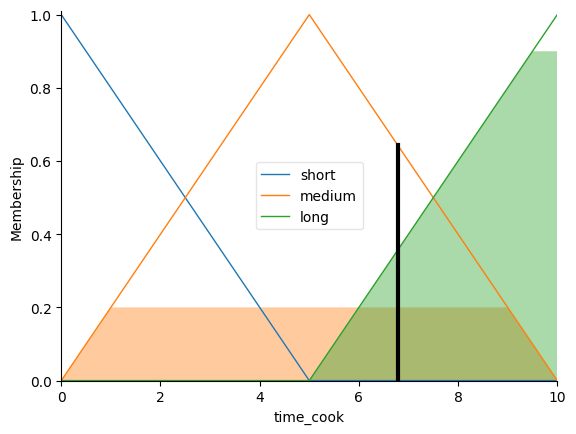

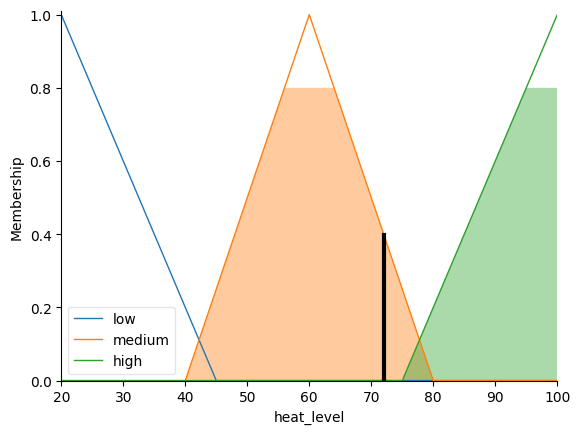

In [7]:
#2.7
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food=ctrl.Antecedent(np.arange(0,10.1,1), 'food')
weight=ctrl.Antecedent(np.arange(0,10.1,1), 'weight')
temperature=ctrl.Antecedent(np.arange(0,61,1), 'temperature')
water=ctrl.Antecedent(np.arange(0,10.1,1), 'water')
time_cook=ctrl.Consequent(np.arange(0,10.1,1), 'time_cook')
heat_level=ctrl.Consequent(np.arange(20,101,1), 'heat_level')
food['soft']=fuzz.trimf(food.universe,[0,0,5])
food['medium']=fuzz.trimf(food.universe,[0,5,10])
food['hard']=fuzz.trimf(food.universe,[5,10,10])
food.view()
weight['light']=fuzz.trimf(weight.universe,[0,0,5])
weight['medium']=fuzz.trimf(weight.universe,[0,5,10])
weight['heavy']=fuzz.trimf(weight.universe,[5,10,10])
weight.view()
temperature['cold']=fuzz.trimf(temperature.universe,[0,0,15])
temperature['warm']=fuzz.trimf(temperature.universe,[10,20,35])
temperature['hot']=fuzz.trimf(temperature.universe,[30,40,60])
temperature.view()
water['low']=fuzz.trimf(water.universe,[0,0,5])
water['medium']=fuzz.trimf(water.universe,[0,5,10])
water['high']=fuzz.trimf(water.universe,[5,10,10])
water.view()
time_cook['short']=fuzz.trimf(time_cook.universe,[0,0,5])
time_cook['medium']=fuzz.trimf(time_cook.universe,[0,5,10])
time_cook['long']=fuzz.trimf(time_cook.universe,[5,10,10])
time_cook.view()
heat_level['low']=fuzz.trimf(heat_level.universe,[20,20,45])
heat_level['medium']=fuzz.trimf(heat_level.universe,[40,60,80])
heat_level['high']=fuzz.trimf(heat_level.universe,[75,100,100])
heat_level.view()
rule1=ctrl.Rule(food['hard'] | weight['heavy'], time_cook['long'])
rule2=ctrl.Rule(food['soft'] | weight['light'], time_cook['short'])
rule3=ctrl.Rule(food['medium'] | weight['medium'], time_cook['medium'])
rule4=ctrl.Rule(food['hard'] | temperature['warm'], heat_level['medium'])
rule5=ctrl.Rule(food['hard'] | water['low'], heat_level['high'])
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['food']=9
fuzzy_system.input['weight']=9.5
fuzzy_system.input['temperature']=30
fuzzy_system.input['water']=3
fuzzy_system.compute()
print("thời gian nấu:", fuzzy_system.output['time_cook'])
print("mức nhiệt:", fuzzy_system.output['heat_level'])
time_cook.view(sim=fuzzy_system)
heat_level.view(sim=fuzzy_system)

liều thuốc: 8.293650793650793
dịch truyền tĩnh mạch: 8.25
liệu pháp oxy: 5.821680093225923


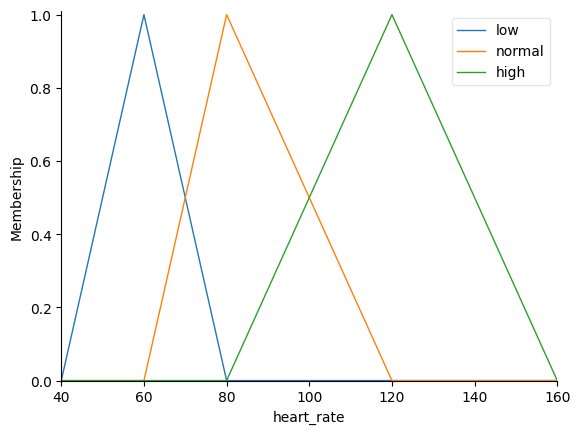

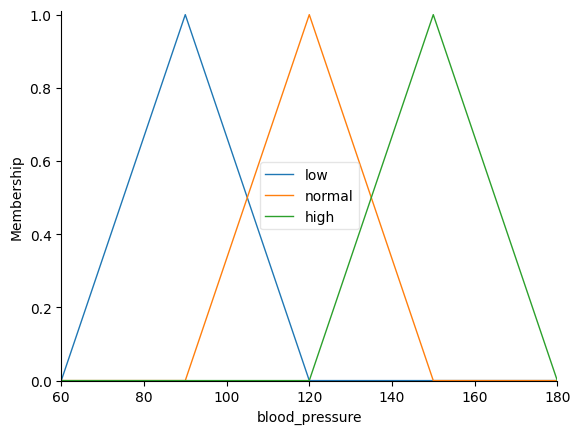

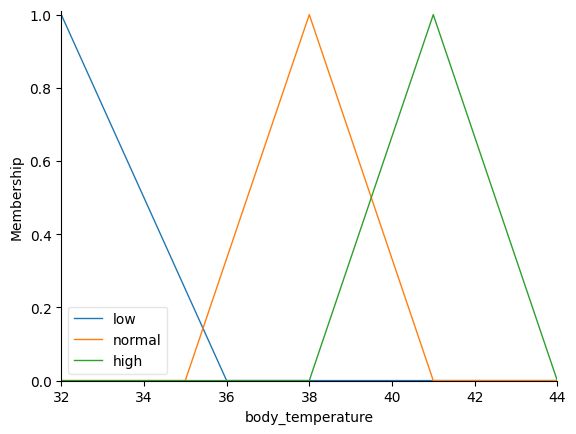

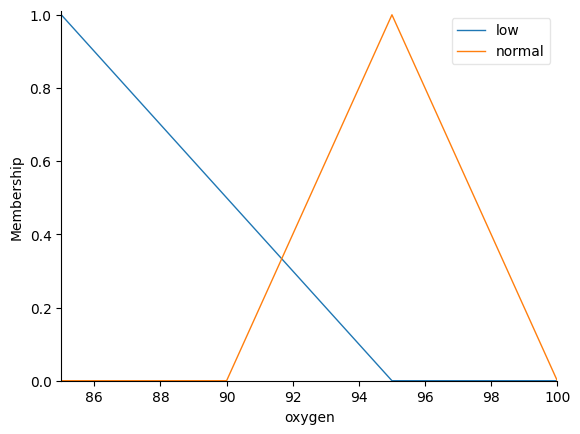

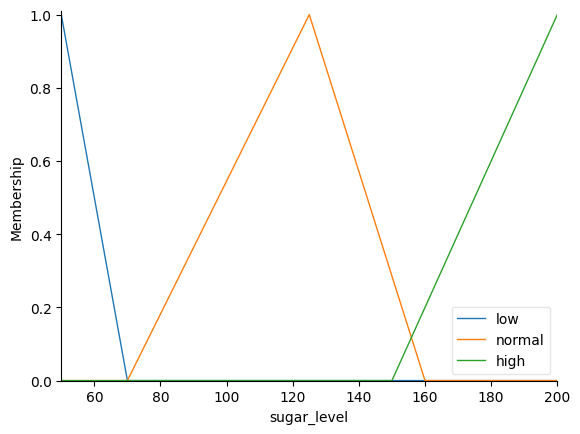

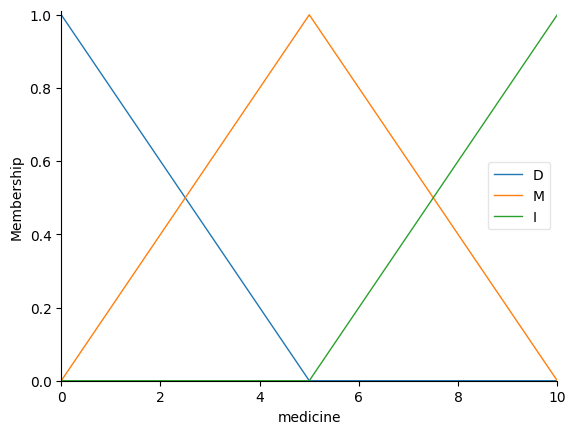

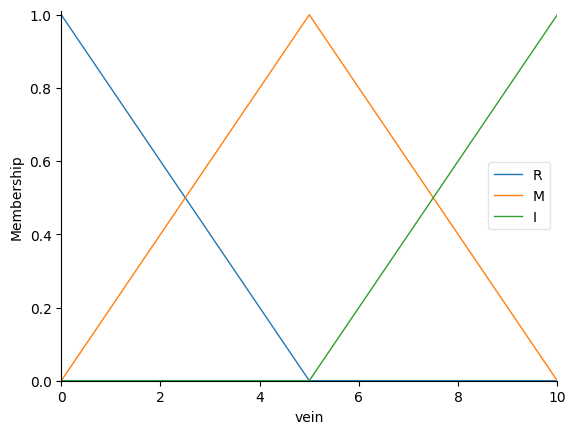

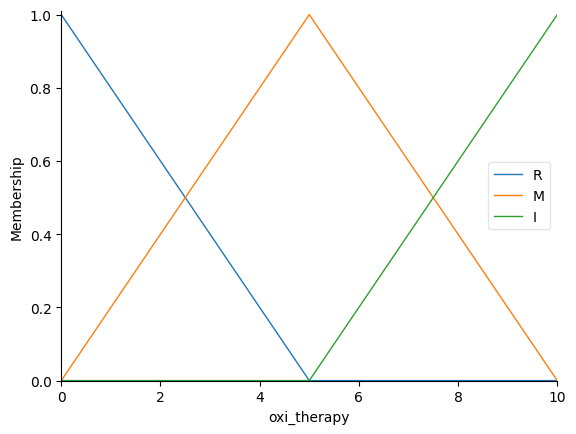

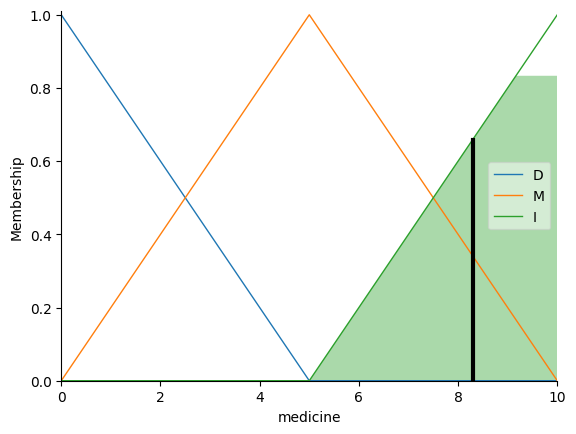

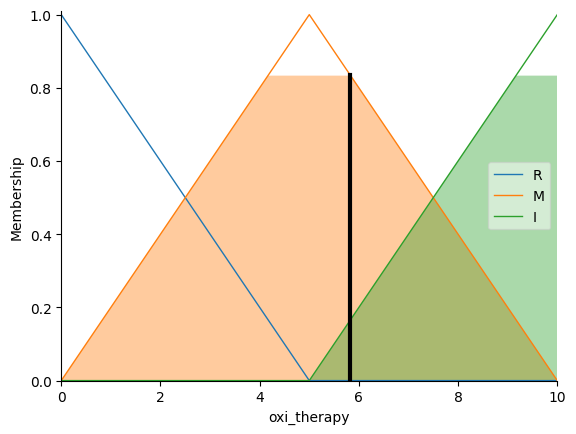

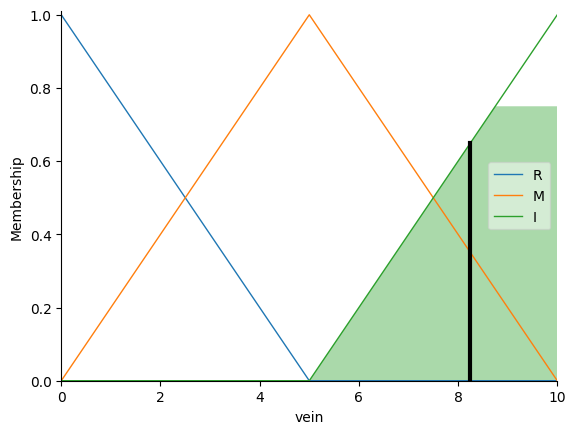

In [8]:
#2.8
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
heart_rate=ctrl.Antecedent(np.arange(40,161,1), 'heart_rate')
blood_pressure=ctrl.Antecedent(np.arange(60,181,1), 'blood_pressure')
body_temperature=ctrl.Antecedent(np.arange(32,44.1,1), 'body_temperature')
oxygen=ctrl.Antecedent(np.arange(85,100.1,1), 'oxygen')
sugar_level=ctrl.Antecedent(np.arange(50,200.1,1), 'sugar_level')
medicine=ctrl.Consequent(np.arange(0,10.1,1), 'medicine')
vein=ctrl.Consequent(np.arange(0,10.1,1), 'vein')
oxi_therapy=ctrl.Consequent(np.arange(0,10.1,1), 'oxi_therapy')

heart_rate['low']=fuzz.trimf(heart_rate.universe, [40,60,80])
heart_rate['normal']=fuzz.trimf(heart_rate.universe, [60,80,120])
heart_rate['high']=fuzz.trimf(heart_rate.universe, [80,120,160])
heart_rate.view()
blood_pressure['low']=fuzz.trimf(blood_pressure.universe, [60,90,120])
blood_pressure['normal']=fuzz.trimf(blood_pressure.universe, [90,120,150])
blood_pressure['high']=fuzz.trimf(blood_pressure.universe, [120,150,180])
blood_pressure.view()
body_temperature['low']=fuzz.trimf(body_temperature.universe, [32,32,36])
body_temperature['normal']=fuzz.trimf(body_temperature.universe, [35,38,41])
body_temperature['high']=fuzz.trimf(body_temperature.universe, [38,41,44])
body_temperature.view()
oxygen['low']=fuzz.trimf(oxygen.universe, [85,85,95])
oxygen['normal']=fuzz.trimf(oxygen.universe, [90,95,100])
oxygen.view()
sugar_level['low']=fuzz.trimf(sugar_level.universe, [50,50,70])
sugar_level['normal']=fuzz.trimf(sugar_level.universe, [70,125,160])
sugar_level['high']=fuzz.trimf(sugar_level.universe, [150,200,200])
sugar_level.view()
medicine['D']=fuzz.trimf(medicine.universe, [0,0,5])
medicine['M']=fuzz.trimf(medicine.universe, [0,5,10])
medicine['I']=fuzz.trimf(medicine.universe, [5,10,10])
medicine.view()
vein['R']=fuzz.trimf(vein.universe, [0,0,5])
vein['M']=fuzz.trimf(vein.universe, [0,5,10])
vein['I']=fuzz.trimf(vein.universe, [5,10,10])
vein.view()
oxi_therapy['R']=fuzz.trimf(oxi_therapy.universe, [0,0,5])
oxi_therapy['M']=fuzz.trimf(oxi_therapy.universe, [0,5,10])
oxi_therapy['I']=fuzz.trimf(oxi_therapy.universe, [5,10,10])
oxi_therapy.view()
rule1=ctrl.Rule(heart_rate['low'] | blood_pressure['low'], (vein['I'], medicine['I']))
rule2=ctrl.Rule(heart_rate['high'] | blood_pressure['high'], medicine['D'])
rule3=ctrl.Rule(heart_rate['normal'] | blood_pressure['normal'], medicine['M'])
rule4=ctrl.Rule(body_temperature['high'] | oxygen['low'], (oxi_therapy['I'], medicine['I']))
rule5=ctrl.Rule(body_temperature['normal'] | oxygen['normal'], medicine['D'])
rule6=ctrl.Rule(body_temperature['low'] | oxygen['low'], (oxi_therapy['I'], vein['I']))
rule7=ctrl.Rule(sugar_level['high'], medicine['I'])
rule8=ctrl.Rule(sugar_level['low'], medicine['D'])
rule9=ctrl.Rule(sugar_level['normal'], medicine['M'])
rule10=ctrl.Rule(blood_pressure['high'] | heart_rate['high'], medicine['D'])
rule11=ctrl.Rule(blood_pressure['low'] | heart_rate['low'] | oxygen['low'], (vein['I'], oxi_therapy['I'], medicine['I']))
rule12=ctrl.Rule(body_temperature['high'] | blood_pressure['high'] | oxygen['normal'], (medicine['I'], oxi_therapy['M']))
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['heart_rate']=55
fuzzy_system.input['blood_pressure']=80
fuzzy_system.input['body_temperature']=41.5
fuzzy_system.input['oxygen']=88
fuzzy_system.input['sugar_level']=190
fuzzy_system.compute()
print("liều thuốc:", fuzzy_system.output['medicine'])
print("dịch truyền tĩnh mạch:", fuzzy_system.output['vein'])
print("liệu pháp oxy:", fuzzy_system.output['oxi_therapy'])
medicine.view(sim=fuzzy_system)
oxi_therapy.view(sim=fuzzy_system)
vein.view(sim=fuzzy_system)

cảm xúc đó là : 5.318989792326649


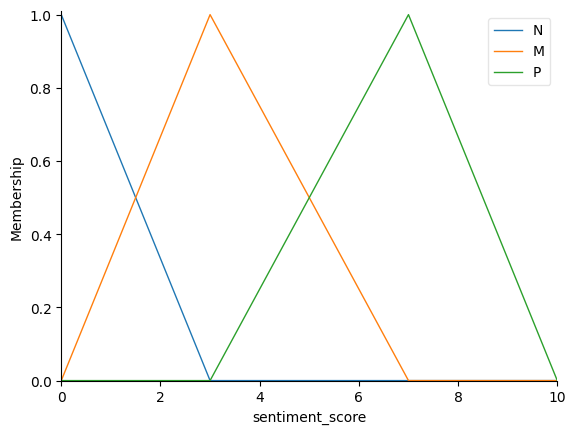

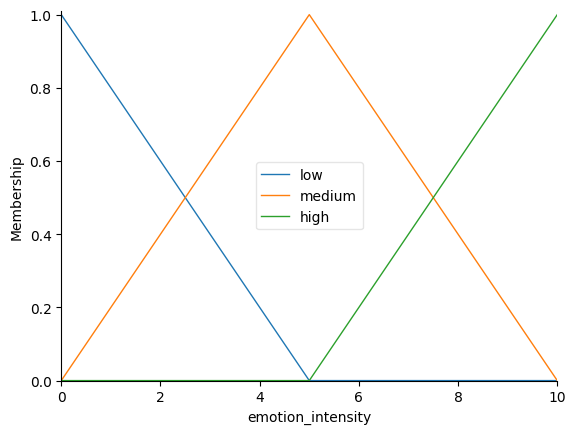

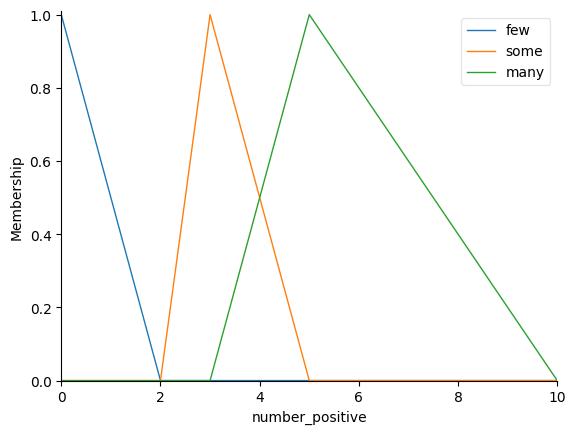

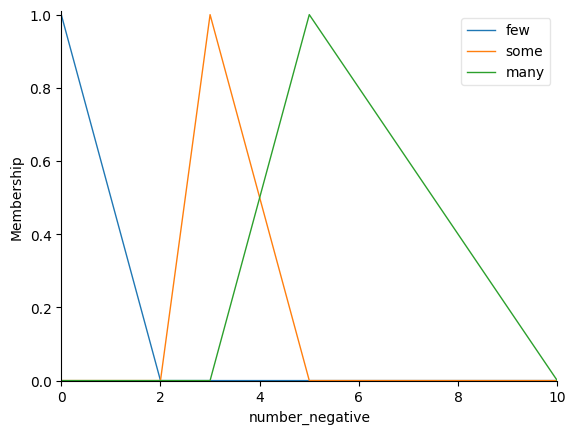

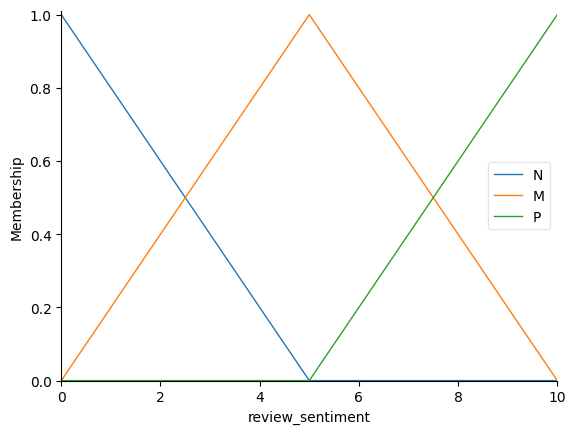

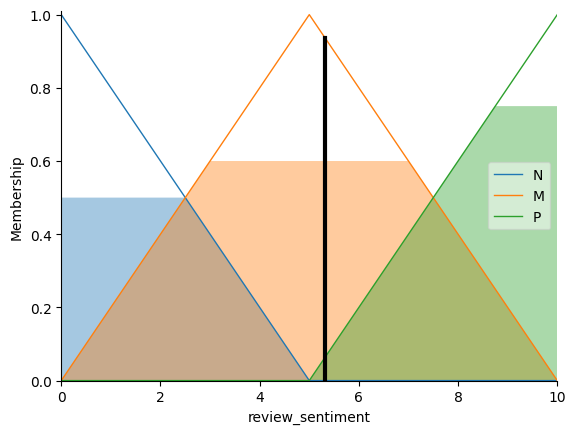

In [9]:
#2.9
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
sentiment_score=ctrl.Antecedent(np.arange(0,10.1,0.1), 'sentiment_score')
emotion_intensity=ctrl.Antecedent(np.arange(0,10.1,0.1),'emotion_intensity')
number_positive=ctrl.Antecedent(np.arange(0,10.1,0.1), 'number_positive')
number_negative=ctrl.Antecedent(np.arange(0,10.1,0.1), 'number_negative')
review_sentiment=ctrl.Consequent(np.arange(0,10.1,0.1), 'review_sentiment')
sentiment_score['N']=fuzz.trimf(sentiment_score.universe, [0,0,3])
sentiment_score['M']=fuzz.trimf(sentiment_score.universe, [0,3,7])
sentiment_score['P']=fuzz.trimf(sentiment_score.universe, [3,7,10])
sentiment_score.view()
emotion_intensity['low']=fuzz.trimf(emotion_intensity.universe, [0,0,5])
emotion_intensity['medium']=fuzz.trimf(emotion_intensity.universe, [0,5,10])
emotion_intensity['high']=fuzz.trimf(emotion_intensity.universe, [5,10,10])
emotion_intensity.view()
number_positive['few']=fuzz.trimf(number_positive.universe, [0,0,2])
number_positive['some']=fuzz.trimf(number_positive.universe, [2,3,5])
number_positive['many']=fuzz.trimf(number_positive.universe, [3,5,10])
number_positive.view()
number_negative['few']=fuzz.trimf(number_negative.universe, [0,0,2])
number_negative['some']=fuzz.trimf(number_negative.universe, [2,3,5])
number_negative['many']=fuzz.trimf(number_negative.universe, [3,5,10])
number_negative.view()
review_sentiment['N']=fuzz.trimf(review_sentiment.universe, [0,0,5])
review_sentiment['M']=fuzz.trimf(review_sentiment.universe, [0,5,10])
review_sentiment['P']=fuzz.trimf(review_sentiment.universe, [5,10,10])
review_sentiment.view()
rule1=ctrl.Rule(sentiment_score['N'] | emotion_intensity['high'], review_sentiment['N'])
rule2=ctrl.Rule(sentiment_score['N'] | emotion_intensity['low'], review_sentiment['M'])
rule3=ctrl.Rule(sentiment_score['M'] | emotion_intensity['medium'], review_sentiment['M'])
rule4=ctrl.Rule(sentiment_score['P'] | emotion_intensity['high'], review_sentiment['P'])
rule5=ctrl.Rule(number_positive['many'] | number_negative['few'], review_sentiment['P'])
rule6=ctrl.Rule(number_positive['few'] | number_negative['many'], review_sentiment['N'])
rule7=ctrl.Rule(number_positive['some'] | number_negative['some'], review_sentiment['M'])
rule8=ctrl.Rule(sentiment_score['N'] | number_negative['many'] | emotion_intensity['high'], review_sentiment['N'])
rule9=ctrl.Rule(sentiment_score['M'] | number_positive['some'] | emotion_intensity['medium'], review_sentiment['M'])
rule10=ctrl.Rule(sentiment_score['P'] | number_positive['many'] | emotion_intensity['high'], review_sentiment['P'])
control_system= ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['sentiment_score']=6
fuzzy_system.input['emotion_intensity']=7
fuzzy_system.input['number_positive']=7
fuzzy_system.input['number_negative']=4
fuzzy_system.compute()
print("cảm xúc đó là :", fuzzy_system.output['review_sentiment'])
review_sentiment.view(sim=fuzzy_system)


thời gian dự kiến: 21.28585558852622
thưởng: 30.000000000000004
đánh giá: 2.8226950354609928


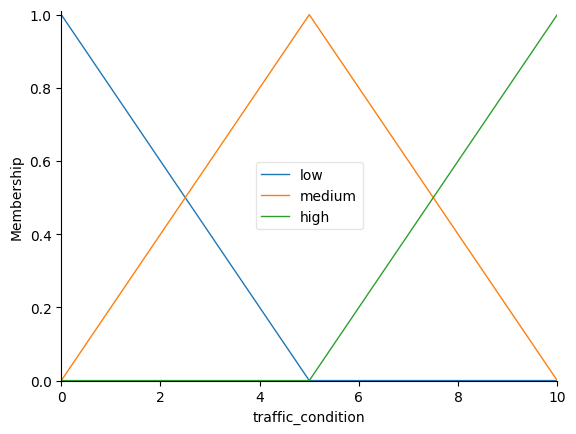

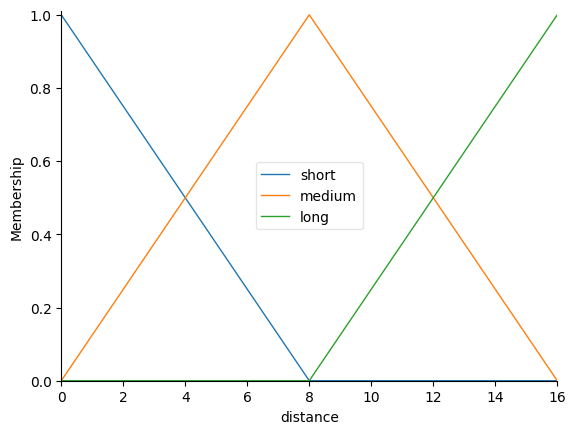

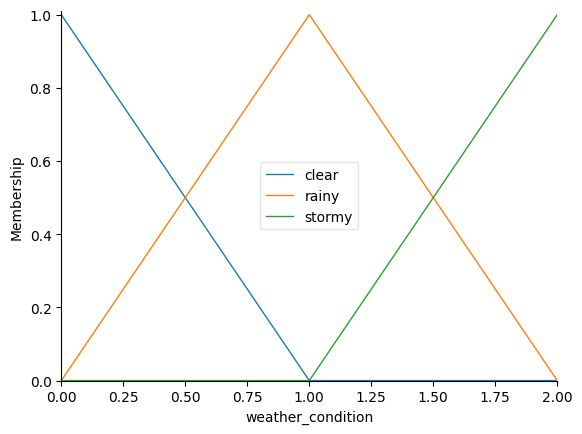

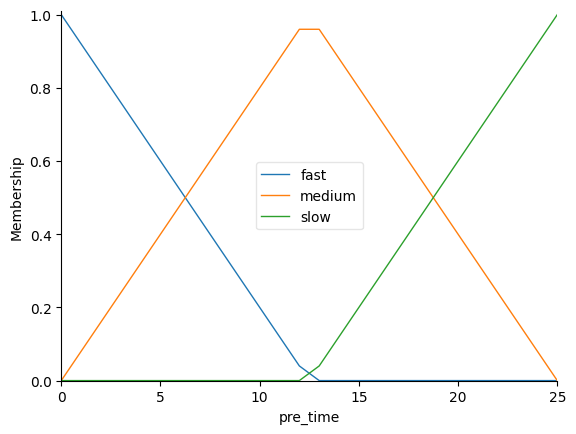

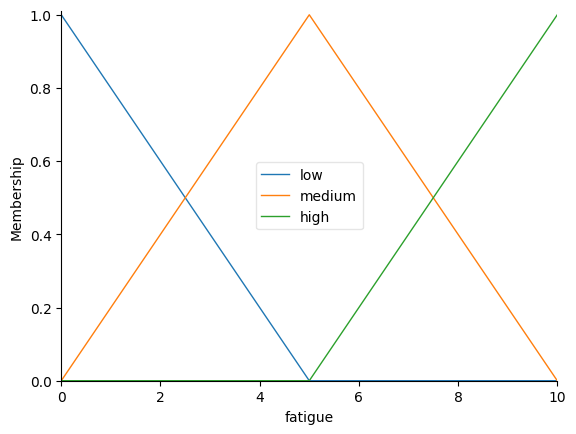

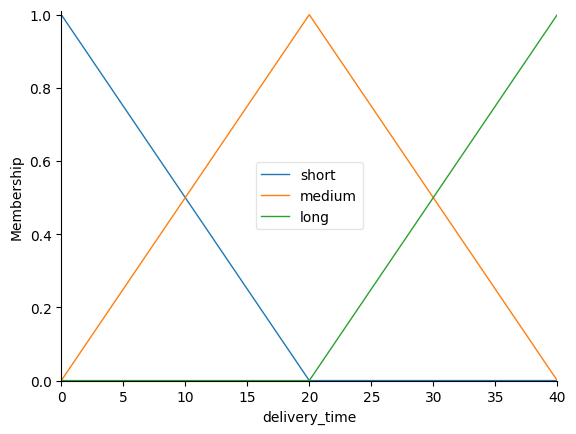

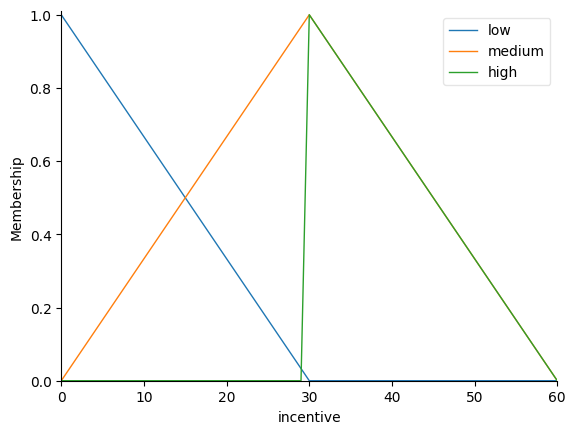

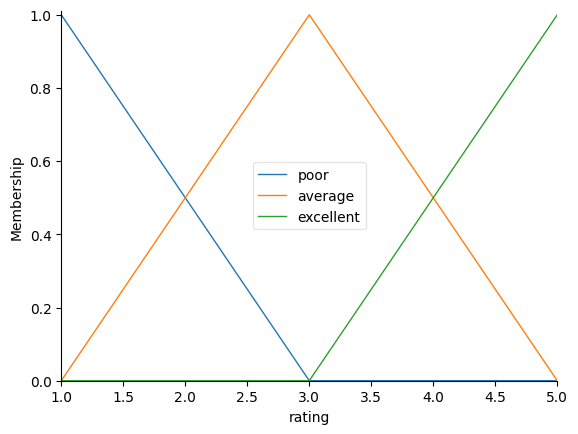

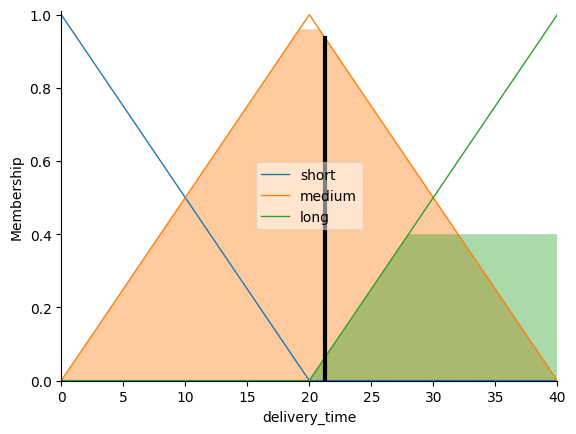

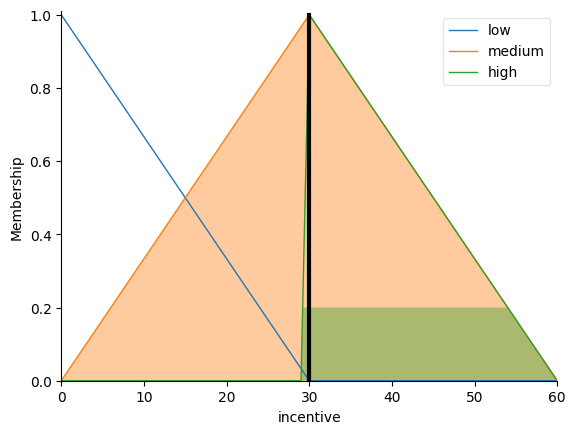

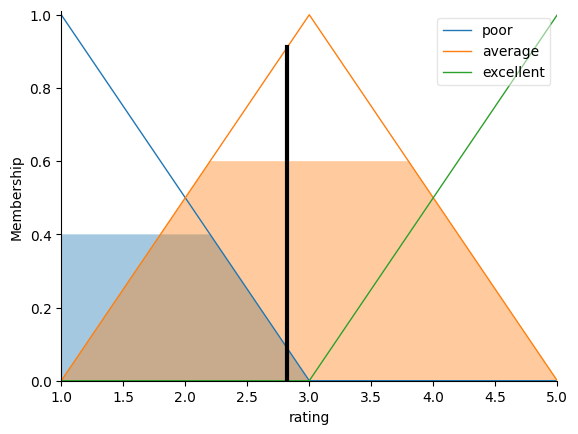

In [10]:
#2.10
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
traffic_condition=ctrl.Antecedent(np.arange(0,11,1), 'traffic_condition')
distance=ctrl.Antecedent(np.arange(0,17,1),'distance')
weather_condition=ctrl.Antecedent(np.arange(0,3,1), 'weather_condition')
pre_time=ctrl.Antecedent(np.arange(0,26,1), 'pre_time')
fatigue=ctrl.Antecedent(np.arange(0,11,1), 'fatigue')
delivery_time=ctrl.Consequent(np.arange(0,41,1), 'delivery_time')
incentive=ctrl.Consequent(np.arange(0,61,1), 'incentive')
rating=ctrl.Consequent(np.arange(1,6,1), 'rating')
traffic_condition['low']=fuzz.trimf(traffic_condition.universe, [0,0,5])
traffic_condition['medium']=fuzz.trimf(traffic_condition.universe, [0,5,10])
traffic_condition['high']=fuzz.trimf(traffic_condition.universe, [5,10,10])
distance['short']=fuzz.trimf(distance.universe, [0,0,8])
distance['medium']=fuzz.trimf(distance.universe, [0,8,16])
distance['long']=fuzz.trimf(distance.universe, [8,16,16])
weather_condition['clear']=fuzz.trimf(weather_condition.universe, [0,0,1])
weather_condition['rainy']=fuzz.trimf(weather_condition.universe, [0,1,2])
weather_condition['stormy']=fuzz.trimf(weather_condition.universe, [1,2,2])
pre_time['fast']=fuzz.trimf(pre_time.universe, [0,0,12.5])
pre_time['medium']=fuzz.trimf(pre_time.universe, [0,12.5,25])
pre_time['slow']=fuzz.trimf(pre_time.universe, [12.5,25,25])
fatigue['low']=fuzz.trimf(fatigue.universe, [0,0,5])
fatigue['medium']=fuzz.trimf(fatigue.universe, [0,5,10])
fatigue['high']=fuzz.trimf(fatigue.universe, [5,10,10])
traffic_condition.view()
distance.view()
weather_condition.view()
pre_time.view()
fatigue.view()
delivery_time['short']=fuzz.trimf(delivery_time.universe, [0,0,20])
delivery_time['medium']=fuzz.trimf(delivery_time.universe, [0,20,40])
delivery_time['long']=fuzz.trimf(delivery_time.universe, [20,40,40])
incentive['low']=fuzz.trimf(incentive.universe, [0,0,30])
incentive['medium']=fuzz.trimf(incentive.universe, [0,30,60])
incentive['high']=fuzz.trimf(incentive.universe, [30,30,60])
rating['poor']=fuzz.trimf(rating.universe, [1,1,3])
rating['average']=fuzz.trimf(rating.universe, [1,3,5])
rating['excellent']=fuzz.trimf(rating.universe, [3,5,5])
delivery_time.view()
incentive.view()
rating.view()
rule1=ctrl.Rule(traffic_condition['low'] | distance['short'], delivery_time['short'])
rule2=ctrl.Rule(traffic_condition['medium'] | distance['medium'], delivery_time['medium'])
rule3=ctrl.Rule(traffic_condition['high'] | distance['long'], delivery_time['long'])

rule4=ctrl.Rule(weather_condition['clear'], incentive['low'])
rule5=ctrl.Rule(weather_condition['rainy'], incentive['medium'])
rule6=ctrl.Rule(weather_condition['stormy'], incentive['high'])

rule7=ctrl.Rule(pre_time['fast'] | traffic_condition['low'], delivery_time['short'])
rule8=ctrl.Rule(pre_time['medium'] | traffic_condition['medium'], delivery_time['medium'])
rule9=ctrl.Rule(pre_time['slow'] | traffic_condition['high'], delivery_time['long'])

rule10=ctrl.Rule(fatigue['low'], rating['excellent'])
rule11=ctrl.Rule(fatigue['medium'], rating['average'])
rule12=ctrl.Rule(fatigue['high'], rating['poor'])

rule13=ctrl.Rule(distance['long'] | weather_condition['stormy'] | traffic_condition['high'], (delivery_time['long'], incentive['high']))
rule14=ctrl.Rule(distance['short'] | weather_condition['clear'] | traffic_condition['low'], (delivery_time['short'], incentive['low']))
rule15=ctrl.Rule(fatigue['high'] | traffic_condition['high'], (delivery_time['long'], rating['poor']))

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
fuzzy_system = ctrl.ControlSystemSimulation(control_system)
fuzzy_system.input['traffic_condition']=6
fuzzy_system.input['distance']=9
fuzzy_system.input['weather_condition']=1
fuzzy_system.input['pre_time']=13
fuzzy_system.input['fatigue']=7
fuzzy_system.compute()
print("thời gian dự kiến:", fuzzy_system.output['delivery_time'])
print("thưởng:", fuzzy_system.output['incentive'])
print("đánh giá:", fuzzy_system.output['rating'])
delivery_time.view(sim=fuzzy_system)
incentive.view(sim=fuzzy_system)
rating.view(sim=fuzzy_system)